Module 6 Case study 2

In [75]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.1/11.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#1 Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.[Hint: Extract values of a specific column using their labels and use hist method of pyplot]

df = pd.read_csv('additional_resources_6_xce_lwxlitn/cereal.csv')
df


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


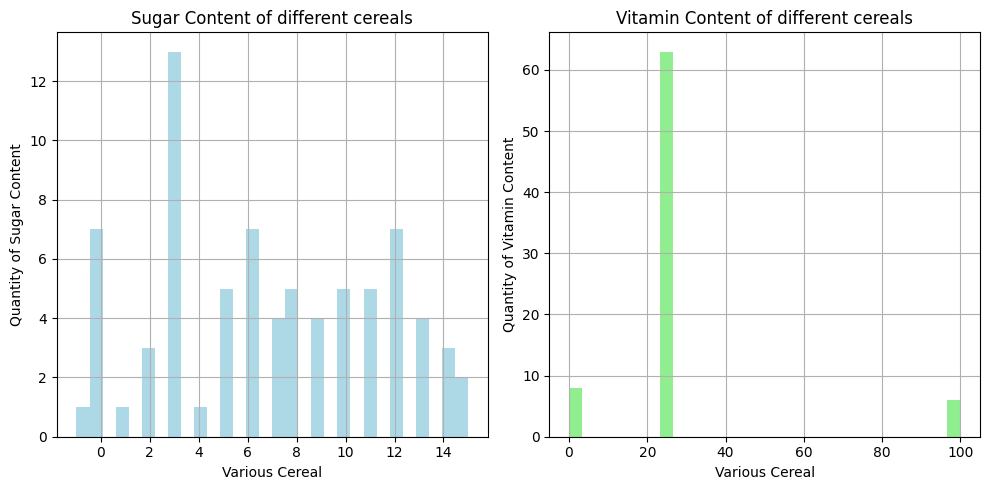

In [37]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
df['sugars'].hist(bins=30, color='lightblue')     #plt.hist(df['sugars'], bins=10)
plt.title('Sugar Content of different cereals')
plt.xlabel('Various Cereal')
plt.ylabel('Quantity of Sugar Content')

plt.subplot(1, 2, 2)
df['vitamins'].hist(bins=30, color='lightgreen')
plt.title('Vitamin Content of different cereals')
plt.xlabel('Various Cereal')
plt.ylabel('Quantity of Vitamin Content')

plt.tight_layout()
plt.show()

In [40]:
#2 The names of the manufacturers are coded using alphabets, create a new column with their full name using the below mapping.
# 'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills','P' :'Post' ,'A':'American Home Foods Products'

cereal = {'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills','P' :'Post' ,'A':'American Home Foods Products'}
df['full mfr name'] = df['mfr'].map(cereal)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,full mfr name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


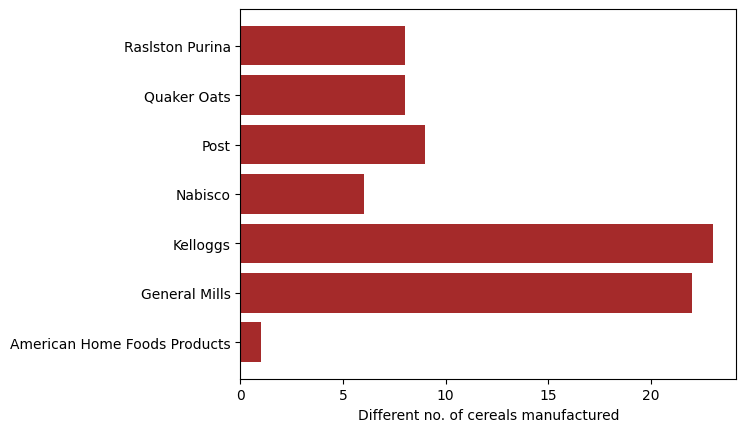

In [70]:
# Create a bar plot where each manufacturer is on the y axis and the height of the bars depicts the number of cereals manufactured by them.
# [Hint: Try using count plot this time or bar method of pyplot]


mfrgroup = df.groupby('full mfr name')['name'].count()
mfrgroup
plt.barh(mfrgroup.index,mfrgroup.values, color='brown')
plt.xlabel('Different no. of cereals manufactured')
plt.show()

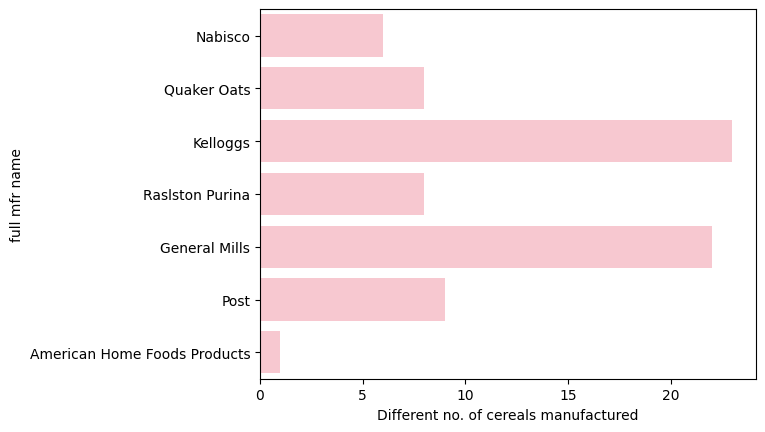

In [68]:
# using count plot

sns.countplot(y= 'full mfr name', data = df, color='pink')    # countplot skips the need to group
plt.xlabel('Different no. of cereals manufactured')
plt.show()

In [91]:
#3 Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as a test set.

df.info()   #12 numerical columns excluding 'rating' column
df.columns
y = df['rating']
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           77 non-null     object 
 1   mfr            77 non-null     object 
 2   type           77 non-null     object 
 3   calories       77 non-null     int64  
 4   protein        77 non-null     int64  
 5   fat            77 non-null     int64  
 6   sodium         77 non-null     int64  
 7   fiber          77 non-null     float64
 8   carbo          77 non-null     float64
 9   sugars         77 non-null     int64  
 10  potass         77 non-null     int64  
 11  vitamins       77 non-null     int64  
 12  shelf          77 non-null     int64  
 13  weight         77 non-null     float64
 14  cups           77 non-null     float64
 15  rating         77 non-null     float64
 16  full mfr name  77 non-null     object 
dtypes: float64(5), int64(8), object(4)
memory usage: 10.4+ K

In [78]:
print(X_train, X_test, y_train, y_test)

    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
38       110        2    1     170    1.0   17.0       6      60       100   
16       100        2    0     290    1.0   21.0       2      35        25   
65        90        3    0       0    3.0   20.0       0     120         0   
7        130        3    2     210    2.0   18.0       8     100        25   
69       110        2    1     200    0.0   21.0       3      35       100   
39       140        3    1     170    2.0   20.0       9      95       100   
26       100        3    0       0    3.0   14.0       7     100        25   
34       120        3    3      75    3.0   13.0       4     100        25   
55        50        2    0       0    1.0   10.0       0      50         0   
27       120        3    2     160    5.0   12.0      10     200        25   
21       110        2    0     220    1.0   21.0       3      30        25   
1        120        3    5      15    2.0    8.0       8     135

In [92]:
#4 Fit a linear regression module and measure the mean squared error on the test dataset.[Hint: Explore linear models and metrics section of sklearn documentation]

regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [94]:
print(regr.score(X_test,y_test))

0.999999999999999


In [105]:
y_pred = regr.predict(X_test)

mse = mean_squared_error(y_true =y_test, y_pred=y_pred)
print(mse)


1.0935429436959676e-13
